## KGFarm's feature transformation

In [1]:
import pandas as pd
df = pd.read_csv(r'C:\Users\niki_\Google Drive\GRAD SCHOOL\Papers\KGFarm-LFE\credit-a.csv')
df = df.infer_objects()

In [2]:
import os
import pandas as pd
os.chdir('../../')

from operations.api import KGFarm
kgfarm = KGFarm()

(KGFarm is running in Human in the loop mode)
Connected to Stardog!
Access the Stardog UI at: https://cloud.stardog.com/


scanning missing values


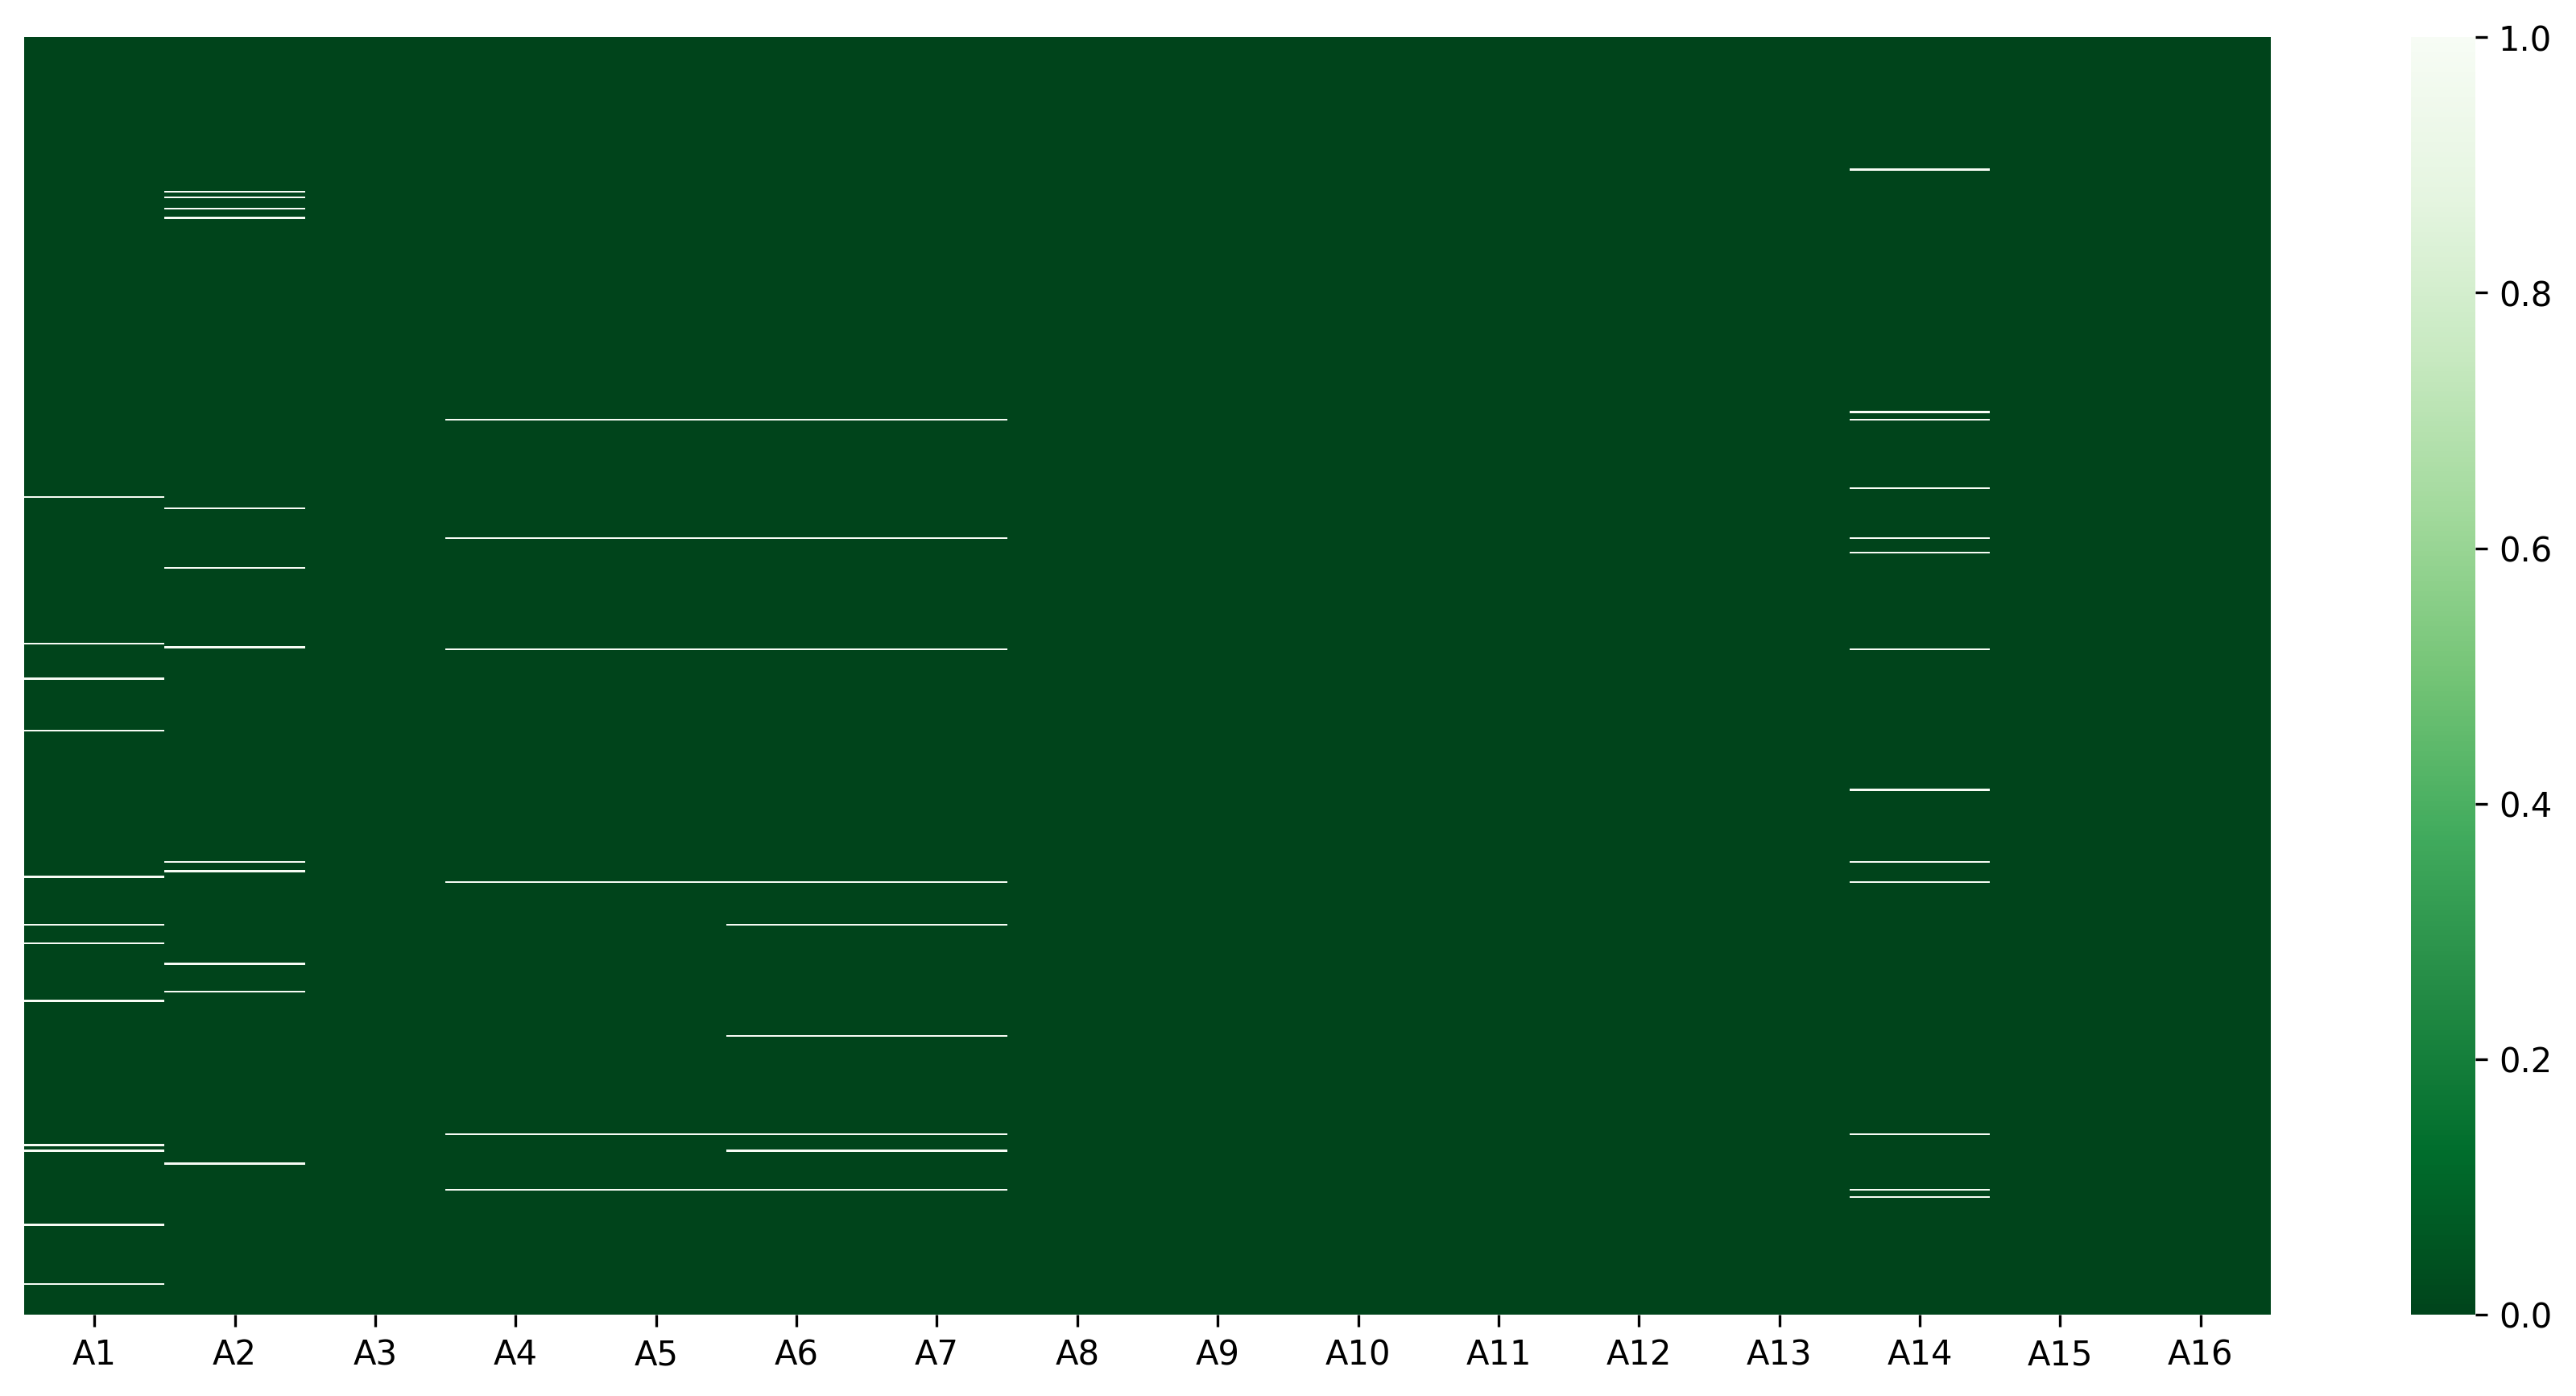

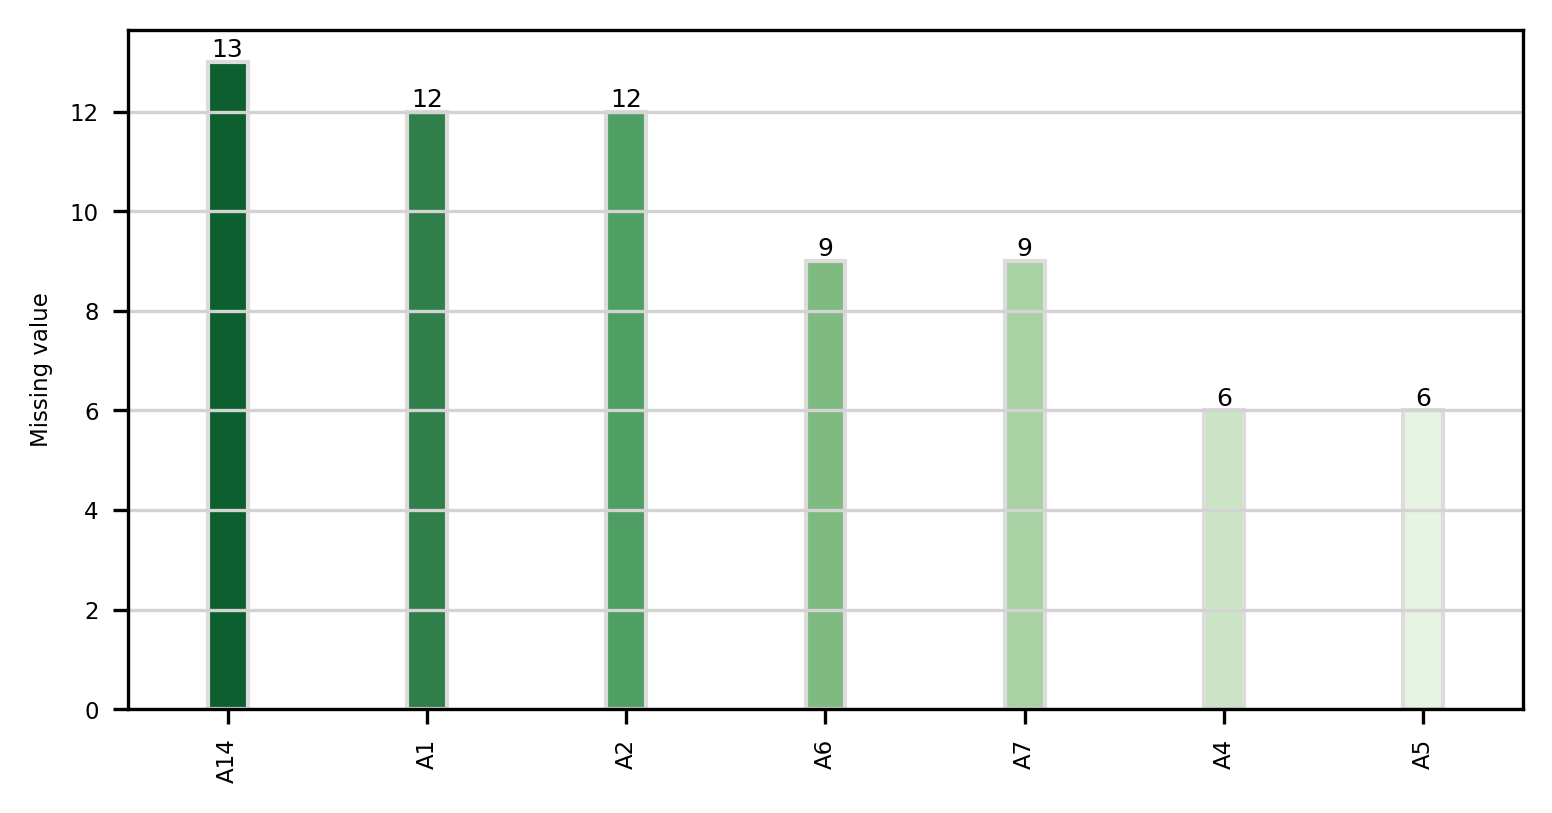

finding similar columns and tables to entity dataframe
IN FOR A14 0      202
1       43
2      280
3      100
4      120
      ... 
685    260
686    200
687    200
688    280
689      0
Name: A14, Length: 690, dtype: object
IN ELSE
IN FOR A1 0      b
1      a
2      a
3      b
4      b
      ..
685    b
686    a
687    a
688    b
689    b
Name: A1, Length: 690, dtype: object
IN ELSE
IN FOR A2 0      30.83
1      58.67
2      24.50
3      27.83
4      20.17
       ...  
685    21.08
686    22.67
687    25.25
688    17.92
689    35.00
Name: A2, Length: 690, dtype: object
IN ELSE
IN FOR A6 0       w
1       q
2       q
3       w
4       w
       ..
685     e
686     c
687    ff
688    aa
689     c
Name: A6, Length: 690, dtype: object
IN ELSE
IN FOR A7 0       v
1       h
2       h
3       v
4       v
       ..
685     h
686     v
687    ff
688     v
689     h
Name: A7, Length: 690, dtype: object
IN ELSE
IN FOR A4 0      u
1      u
2      u
3      u
4      u
      ..
685    y
686    u
687

In [3]:
cl = kgfarm.recommend_cleaning_operations(df)

In [4]:
cl

,probability
fill-0,31.13
fill-mode,30.08
fill,21.19
dropna,15.06
KNNImputer,0.59
fill-mean,0.52
SimpleImputer-median,0.50
Simple_imputer-constant,0.50
fill-empty string,0.27
fill-None,0.12


In [5]:
df = kgfarm.clean(df,cl)

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:00<00:00, 1165.92it/s]


all features look clean


In [6]:
df

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,A15,A16
0,b,30.83,0.00,u,g,w,v,1.25,t,t,1,f,g,202,0,+
1,a,58.67,4.46,u,g,q,h,3.04,t,t,6,f,g,43,560,+
2,a,24.50,0.50,u,g,q,h,1.50,t,f,0,f,g,280,824,+
3,b,27.83,1.54,u,g,w,v,3.75,t,t,5,t,g,100,3,+
4,b,20.17,5.63,u,g,w,v,1.71,t,f,0,f,s,120,0,+
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
685,b,21.08,10.09,y,p,e,h,1.25,f,f,0,f,g,260,0,-
686,a,22.67,0.75,u,g,c,v,2.00,f,t,2,t,g,200,394,-
687,a,25.25,13.50,y,p,ff,ff,2.00,f,t,1,t,g,200,1,-
688,b,17.92,0.21,u,g,aa,v,0.04,f,f,0,f,g,280,750,-


KGFarm exploits the abstracted link between the KGLiDS graph and Farm graph
   * <code> kgfarm.recommend_feature_transformations</code> returns all possible set of feature transformations that exists in the database.
   * <b> You can pass your existing <code>entity_df</code> to <code>kgfarm.recommend_feature_transformations(entity:pd.Dataframe)</code> to look for possible feature transformations for that very entity dataframe.

In [7]:
transformation_info = kgfarm.recommend_feature_transformations(df)
transformation_info

Processing unseen data
IN FOR A1 0      b
1      a
2      a
3      b
4      b
      ..
685    b
686    a
687    a
688    b
689    b
Name: A1, Length: 690, dtype: object
IN ELSE
IN FOR A2 0      30.83
1      58.67
2      24.50
3      27.83
4      20.17
       ...  
685    21.08
686    22.67
687    25.25
688    17.92
689    35.00
Name: A2, Length: 690, dtype: object
IN ELSE
IN FOR A3 0       0.00
1       4.46
2       0.50
3       1.54
4       5.63
       ...  
685    10.09
686     0.75
687    13.50
688     0.21
689     3.38
Name: A3, Length: 690, dtype: float64
IN FOR A4 0      u
1      u
2      u
3      u
4      u
      ..
685    y
686    u
687    y
688    u
689    u
Name: A4, Length: 690, dtype: object
IN ELSE
IN FOR A5 0      g
1      g
2      g
3      g
4      g
      ..
685    p
686    g
687    p
688    g
689    g
Name: A5, Length: 690, dtype: object
IN ELSE
IN FOR A6 0       w
1       q
2       q
3       w
4       w
       ..
685     e
686     c
687    ff
688    aa
689     c
Name: 

,Transformation,Package,Library,Feature,Transformation_type
0,MinMaxScaler,preprocessing,sklearn,"[A11, A15]",Normalization
1,OrdinalEncoder,preprocessing,sklearn,"[A1, A2, A4, A5, A6, A7, A9, A10, A12, A13, A14, A16]",Ordinal encoding


In [8]:
entity_df, transformation_model = kgfarm.apply_transformation(transformation_info.iloc[0],df)

Applying MinMaxScaler transformation
2 feature(s) ['A11', 'A15'] transformed successfully!


In [9]:
entity_df, transformation_model = kgfarm.apply_transformation(transformation_info.iloc[1],entity_df)

Applying OrdinalEncoder transformation
12 feature(s) ['A1', 'A2', 'A4', 'A5', 'A6', 'A7', 'A9', 'A10', 'A12', 'A13', 'A14', 'A16'] transformed successfully!


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:01<00:00, 11.32it/s]


Analyzing features


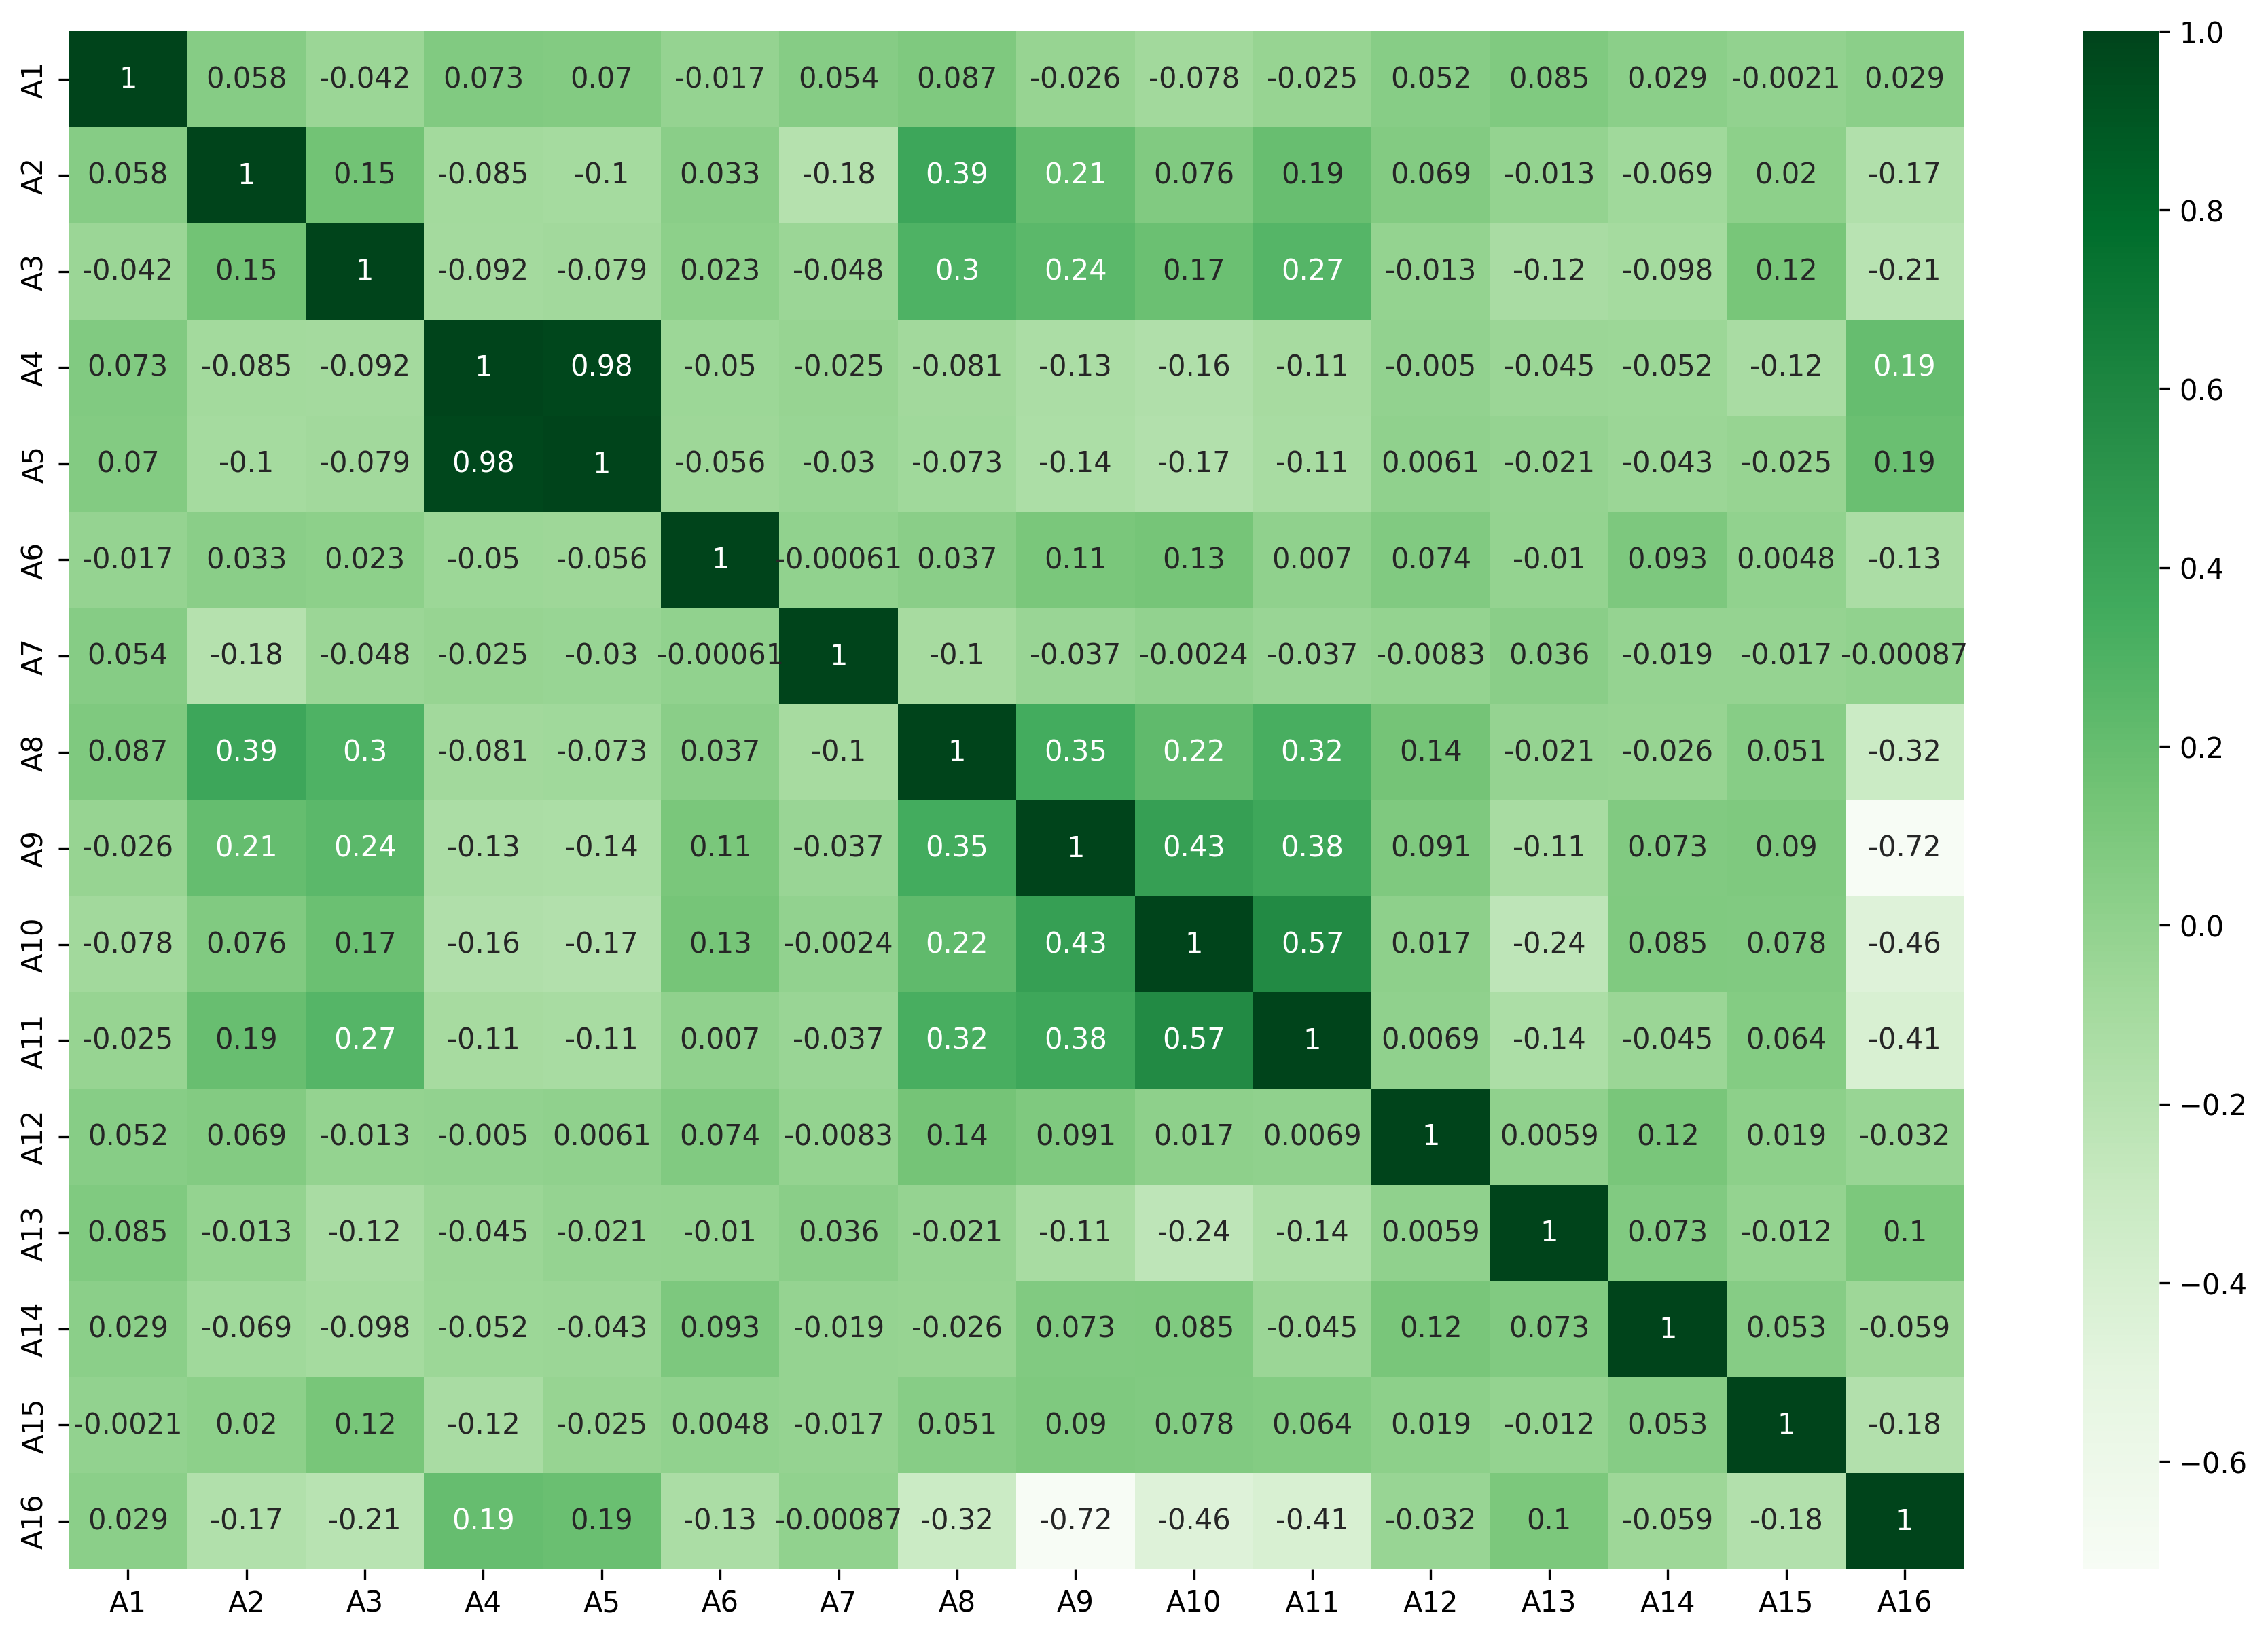

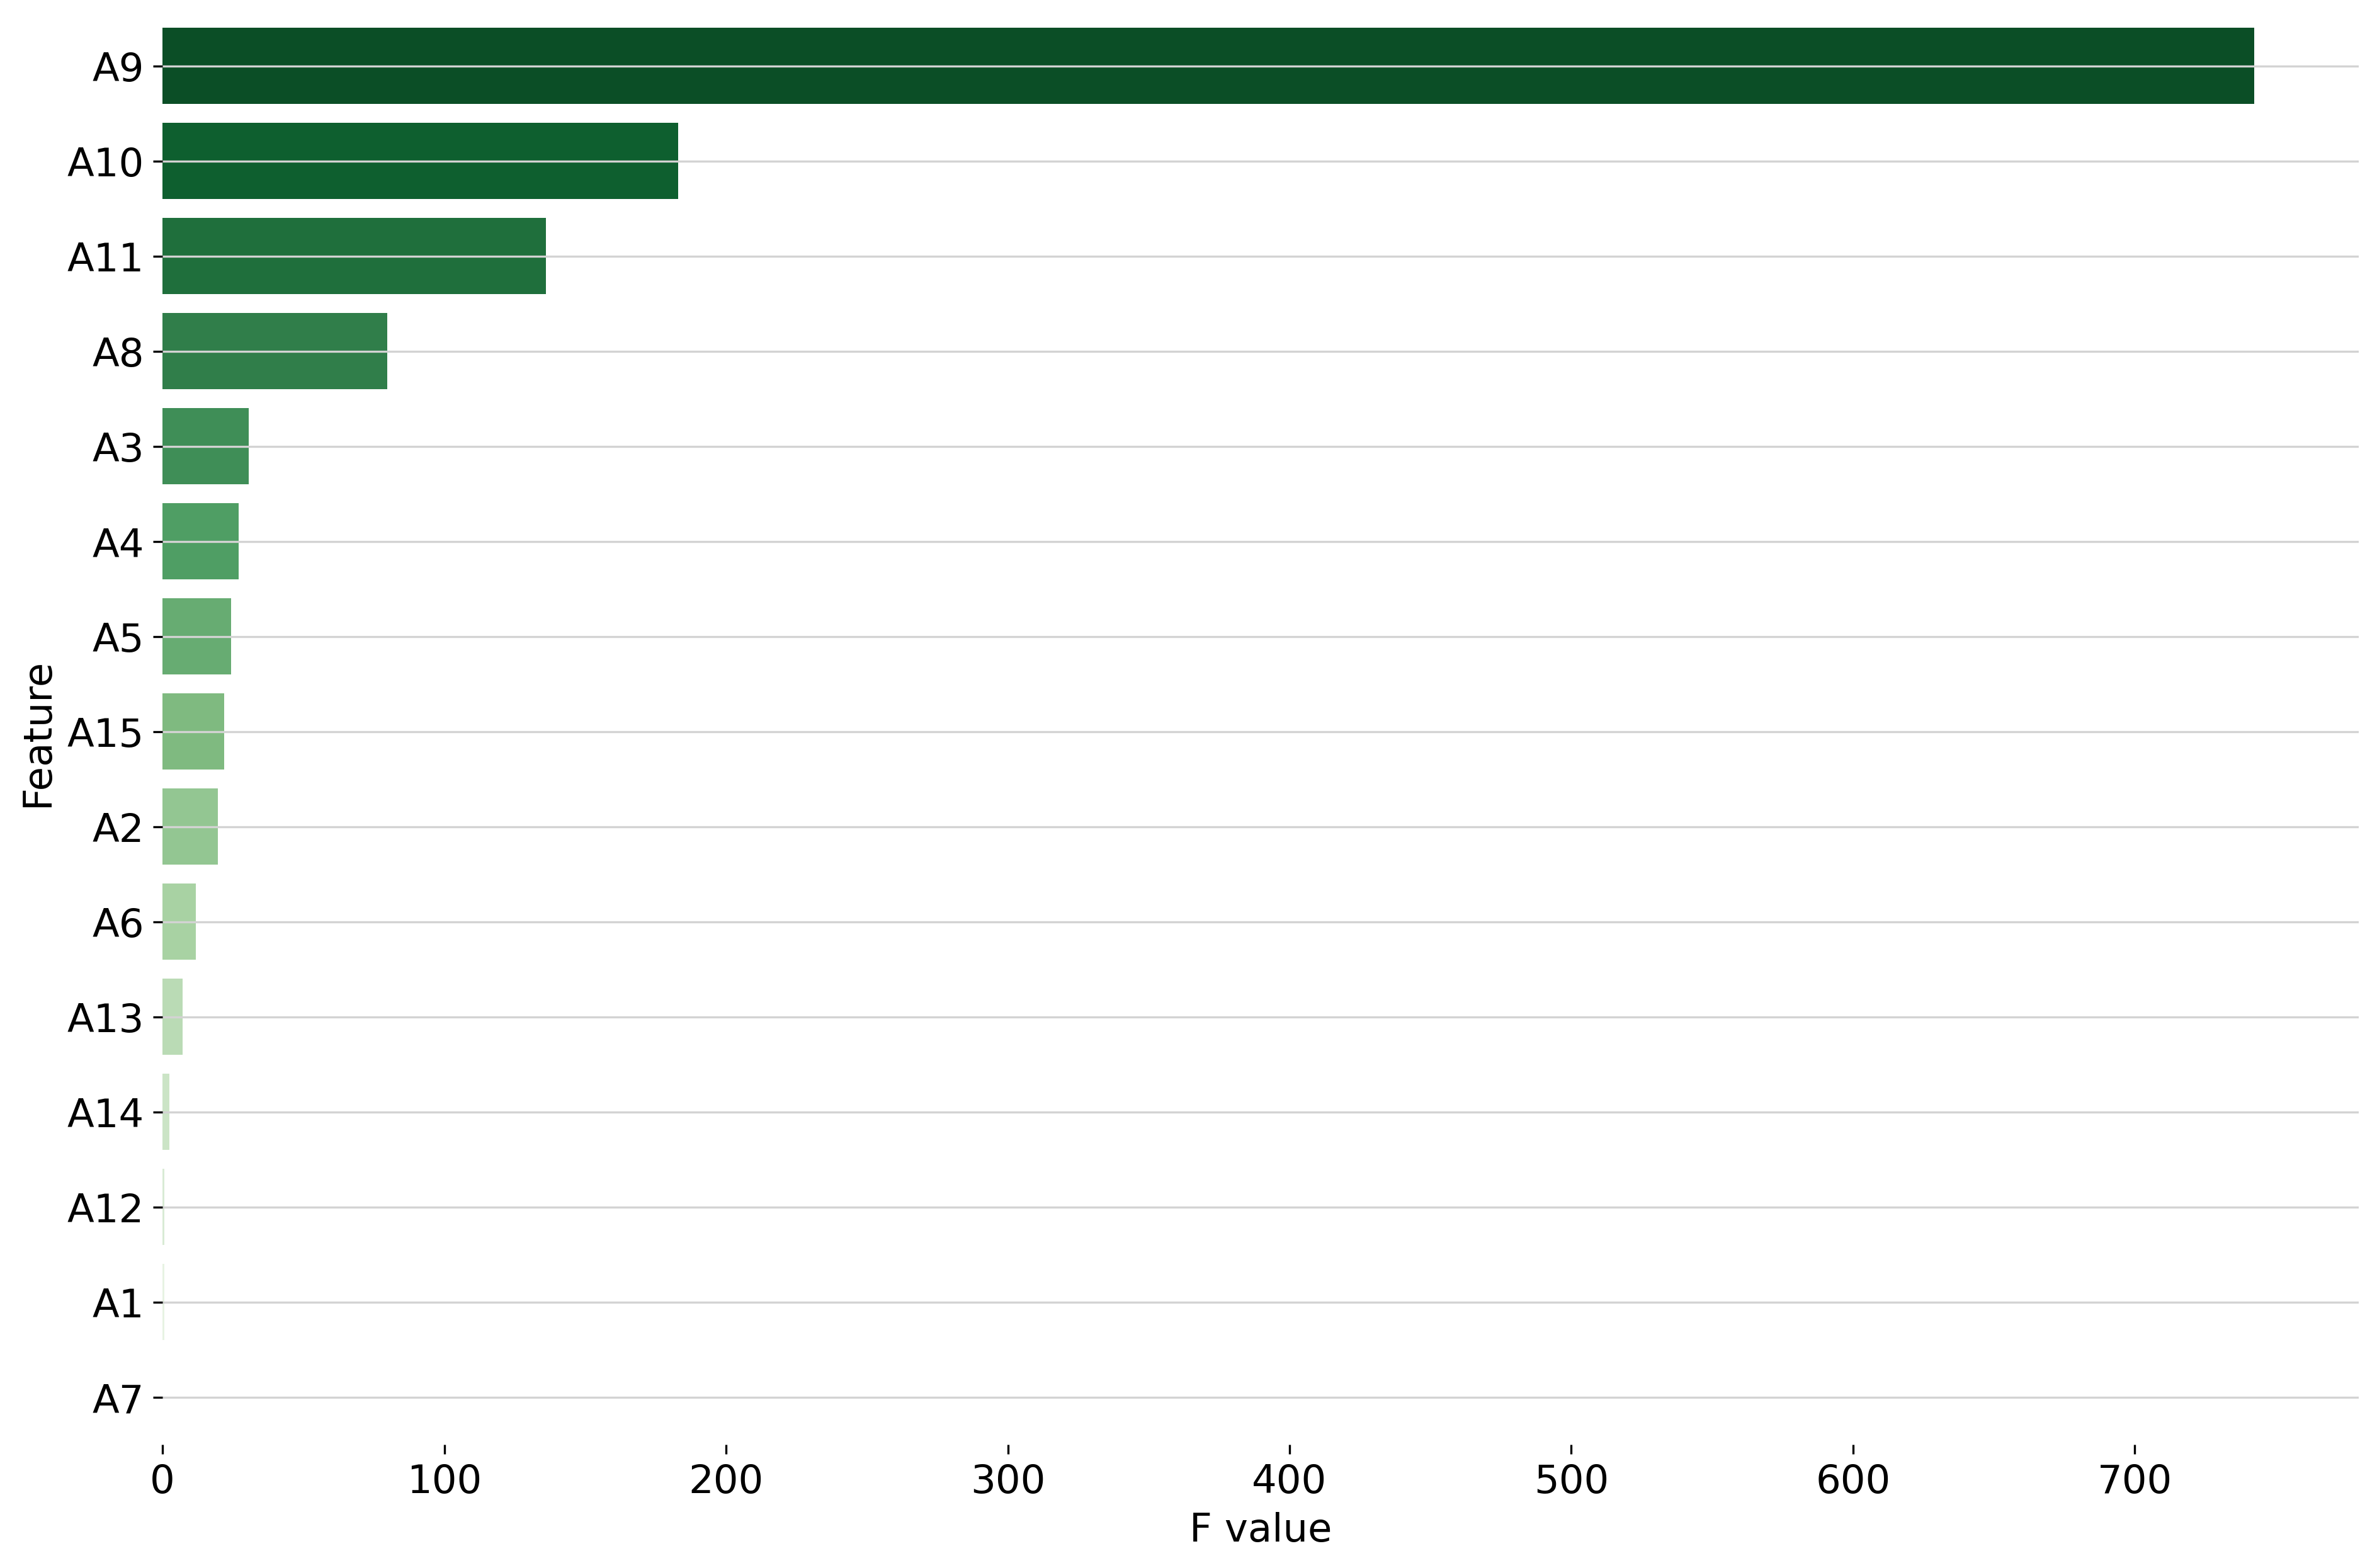

Enter k (where k is the top-k ranked features out of 16 feature(s) 16
Top 15 feature(s) ['A4', 'A5', 'A13', 'A1', 'A7', 'A12', 'A14', 'A6', 'A2', 'A15', 'A3', 'A8', 'A11', 'A10', 'A9'] were selected based on highest Correlation


,A4,A5,A13,A1,A7,A12,A14,A6,A2,A15,A3,A8,A11,A10,A9
0,1.0,0.0,0.0,1.0,7.0,0.0,42.0,12.0,156.0,0.00000,0.00,1.25,0.014925,1.0,1.0
1,1.0,0.0,0.0,0.0,3.0,0.0,118.0,10.0,328.0,0.00560,4.46,3.04,0.089552,1.0,1.0
2,1.0,0.0,0.0,0.0,3.0,0.0,74.0,10.0,89.0,0.00824,0.50,1.50,0.000000,0.0,1.0
3,1.0,0.0,0.0,1.0,7.0,1.0,1.0,12.0,125.0,0.00003,1.54,3.75,0.074627,1.0,1.0
4,1.0,0.0,2.0,1.0,7.0,0.0,8.0,12.0,43.0,0.00000,5.63,1.71,0.000000,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
685,2.0,2.0,0.0,1.0,3.0,0.0,67.0,4.0,52.0,0.00000,10.09,1.25,0.000000,0.0,0.0
686,1.0,0.0,0.0,0.0,7.0,1.0,40.0,1.0,71.0,0.00394,0.75,2.00,0.029851,1.0,0.0
687,2.0,2.0,0.0,0.0,2.0,1.0,40.0,5.0,97.0,0.00001,13.50,2.00,0.014925,1.0,0.0
688,1.0,0.0,0.0,1.0,7.0,0.0,74.0,0.0,20.0,0.00750,0.21,0.04,0.000000,0.0,0.0


In [10]:
X, y = kgfarm.select_features(entity_df, dependent_variable='A16',select_by='correlation')
X

In [11]:
entity_df

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,A15,A16
0,1.0,156.0,0.00,1.0,0.0,12.0,7.0,1.25,1.0,1.0,0.014925,0.0,0.0,42.0,0.00000,0.0
1,0.0,328.0,4.46,1.0,0.0,10.0,3.0,3.04,1.0,1.0,0.089552,0.0,0.0,118.0,0.00560,0.0
2,0.0,89.0,0.50,1.0,0.0,10.0,3.0,1.50,1.0,0.0,0.000000,0.0,0.0,74.0,0.00824,0.0
3,1.0,125.0,1.54,1.0,0.0,12.0,7.0,3.75,1.0,1.0,0.074627,1.0,0.0,1.0,0.00003,0.0
4,1.0,43.0,5.63,1.0,0.0,12.0,7.0,1.71,1.0,0.0,0.000000,0.0,2.0,8.0,0.00000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
685,1.0,52.0,10.09,2.0,2.0,4.0,3.0,1.25,0.0,0.0,0.000000,0.0,0.0,67.0,0.00000,1.0
686,0.0,71.0,0.75,1.0,0.0,1.0,7.0,2.00,0.0,1.0,0.029851,1.0,0.0,40.0,0.00394,1.0
687,0.0,97.0,13.50,2.0,2.0,5.0,2.0,2.00,0.0,1.0,0.014925,1.0,0.0,40.0,0.00001,1.0
688,1.0,20.0,0.21,1.0,0.0,0.0,7.0,0.04,0.0,0.0,0.000000,0.0,0.0,74.0,0.00750,1.0


In [12]:
# entity_df['A16'] = entity_df['A16'].apply(lambda x: 1 if x == '+' else 0)
# entity_df.reset_index(drop=True, inplace=True)
# entity_df

In [13]:
dependent_variable = 'A16'
independent_variables = [feature for feature in list(entity_df.columns) if feature != dependent_variable]

X = entity_df[independent_variables]
y = entity_df[dependent_variable]

In [14]:
from sklearn.model_selection import cross_val_score, KFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

rfc = RandomForestClassifier(n_estimators=100)
lrc = LogisticRegression()

In [15]:
k_folds = KFold(n_splits = 10)

scores = cross_val_score(rfc, X, y, cv = 10, scoring='f1').mean()
scores

0.8299485155780847